In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
data = pd.read_csv('archive\\PS_20174392719_1491204439457_log.csv')

# Remove specified columns that should not be used for fraud detection
columns_to_remove = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'nameOrig', 'nameDest']
data = data.drop(columns=columns_to_remove)

# Encode categorical variables
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

# Normalize/scale the data
scaler = StandardScaler()

# Separate features and target variables for both `isFraud` and `isFlaggedFraud`
X = data.drop(columns=['isFraud', 'isFlaggedFraud'])
y_fraud = data['isFraud']
y_flagged = data['isFlaggedFraud']

# Normalize features
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets for `isFraud`
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(X_scaled, y_fraud, test_size=0.3, random_state=42)

# Split the data into train and test sets for `isFlaggedFraud`
X_train_flagged, X_test_flagged, y_train_flagged, y_test_flagged = train_test_split(X_scaled, y_flagged, test_size=0.3, random_state=42)

# Define the MLP model for `isFraud`
model_fraud = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_fraud.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_fraud.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_fraud = model_fraud.fit(X_train_fraud, y_train_fraud, epochs=10, batch_size=32, validation_split=0.2)

# Predict and evaluate for `isFraud`
y_pred_fraud = (model_fraud.predict(X_test_fraud) > 0.5).astype("int32")

print("Classification Report for isFraud:\n", classification_report(y_test_fraud, y_pred_fraud))
conf_matrix_fraud = confusion_matrix(y_test_fraud, y_pred_fraud)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_fraud, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for isFraud')
plt.show()

# Define the MLP model for `isFlaggedFraud`
model_flagged = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_flagged.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_flagged.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_flagged = model_flagged.fit(X_train_flagged, y_train_flagged, epochs=10, batch_size=32, validation_split=0.2)

# Predict and evaluate for `isFlaggedFraud`
y_pred_flagged = (model_flagged.predict(X_test_flagged) > 0.5).astype("int32")

print("Classification Report for isFlaggedFraud:\n", classification_report(y_test_flagged, y_pred_flagged))
conf_matrix_flagged = confusion_matrix(y_test_flagged, y_pred_flagged)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_flagged, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Flagged', 'Flagged'], yticklabels=['Not Flagged', 'Flagged'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for isFlaggedFraud')
plt.show()



Epoch 1/10


c:\Users\Osama Khalid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


139183/139183 ━━━━━━━━━━━━━━━━━━━━ 217s 2ms/step - accuracy: 0.9988 - loss: 0.0088 - val_accuracy: 0.9989 - val_loss: 0.0065
Epoch 2/10
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 212s 2ms/step - accuracy: 0.9989 - loss: 0.0066 - val_accuracy: 0.9989 - val_loss: 0.0064
Epoch 3/10
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 213s 2ms/step - accuracy: 0.9989 - loss: 0.0064 - val_accuracy: 0.9989 - val_loss: 0.0063
Epoch 4/10
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 212s 2ms/step - accuracy: 0.9989 - loss: 0.0064 - val_accuracy: 0.9989 - val_loss: 0.0063
Epoch 5/10
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 212s 2ms/step - accuracy: 0.9989 - loss: 0.0064 - val_accuracy: 0.9989 - val_loss: 0.0067
Epoch 6/10
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 214s 2ms/step - accuracy: 0.9989 - loss: 0.0064 - val_accuracy: 0.9989 - val_loss: 0.0063
Epoch 7/10
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 217s 2ms/step - accuracy: 0.9989 - loss: 0.0064 - val_accuracy: 0.9989 - val_loss: 0.0063
Epoch 8/10
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 213s 2ms/step

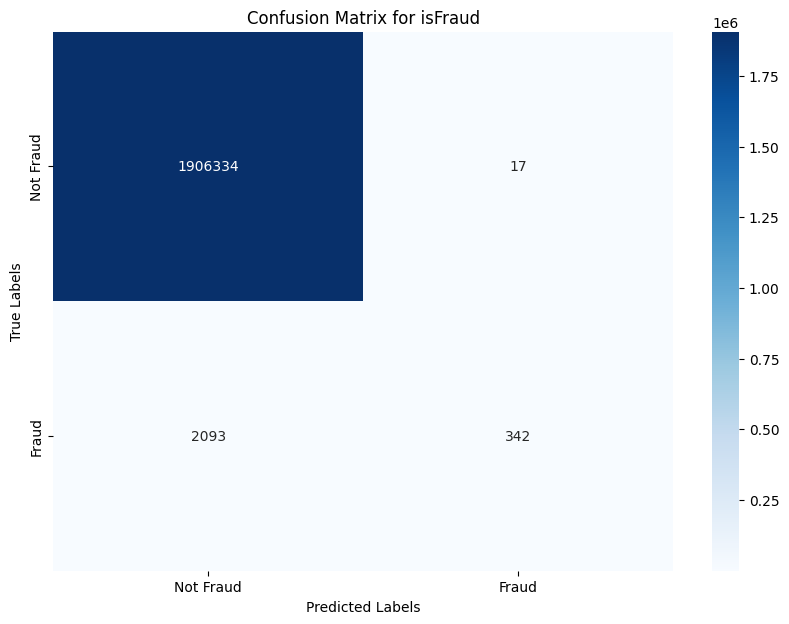

Epoch 1/10


c:\Users\Osama Khalid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


139183/139183 ━━━━━━━━━━━━━━━━━━━━ 216s 2ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 7.2058e-05
Epoch 2/10
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 216s 2ms/step - accuracy: 1.0000 - loss: 4.3351e-05 - val_accuracy: 1.0000 - val_loss: 7.0179e-05
Epoch 3/10
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 214s 2ms/step - accuracy: 1.0000 - loss: 4.7511e-05 - val_accuracy: 1.0000 - val_loss: 7.4584e-05
Epoch 4/10
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 214s 2ms/step - accuracy: 1.0000 - loss: 5.0950e-05 - val_accuracy: 1.0000 - val_loss: 7.2594e-05
Epoch 5/10
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 213s 2ms/step - accuracy: 1.0000 - loss: 4.9733e-05 - val_accuracy: 1.0000 - val_loss: 8.1334e-05
Epoch 6/10
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 212s 2ms/step - accuracy: 1.0000 - loss: 4.9150e-05 - val_accuracy: 1.0000 - val_loss: 7.8067e-05
Epoch 7/10
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 212s 2ms/step - accuracy: 1.0000 - loss: 4.9680e-05 - val_accuracy: 1.0000 - val_loss: 9.1451e-05
Epoch 8

c:\Users\Osama Khalid\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Osama Khalid\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Osama Khalid\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Classification Report for isFlaggedFraud:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1908779
           1       0.00      0.00      0.00         7

    accuracy                           1.00   1908786
   macro avg       0.50      0.50      0.50   1908786
weighted avg       1.00      1.00      1.00   1908786



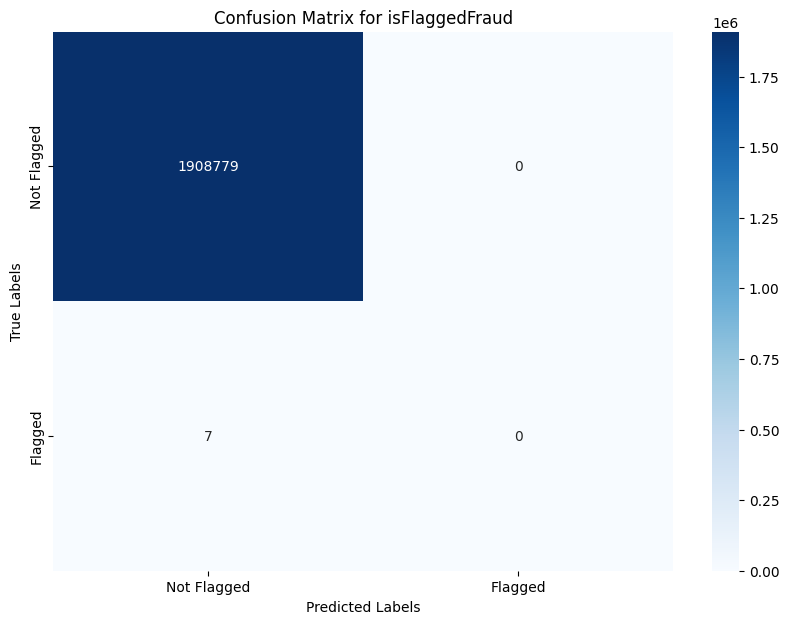

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.data import AUTOTUNE

# Load the dataset
data = pd.read_csv('archive\\PS_20174392719_1491204439457_log.csv')

# Remove specified columns that should not be used for fraud detection
columns_to_remove = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'nameOrig', 'nameDest']
data = data.drop(columns=columns_to_remove)

# Encode categorical variables
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

# Normalize/scale the data
scaler = StandardScaler()

# Separate features and target variables for both `isFraud` and `isFlaggedFraud`
X = data.drop(columns=['isFraud', 'isFlaggedFraud'])
y_fraud = data['isFraud']
y_flagged = data['isFlaggedFraud']

# Normalize features
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets for `isFraud`
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(X_scaled, y_fraud, test_size=0.3, random_state=42)

# Split the data into train and test sets for `isFlaggedFraud`
X_train_flagged, X_test_flagged, y_train_flagged, y_test_flagged = train_test_split(X_scaled, y_flagged, test_size=0.3, random_state=42)

# Create TensorFlow datasets for `isFraud`
train_dataset_fraud = tf.data.Dataset.from_tensor_slices((X_train_fraud, y_train_fraud))
train_dataset_fraud = train_dataset_fraud.shuffle(buffer_size=1024).batch(32).prefetch(buffer_size=AUTOTUNE)

# Create TensorFlow datasets for `isFlaggedFraud`
train_dataset_flagged = tf.data.Dataset.from_tensor_slices((X_train_flagged, y_train_flagged))
train_dataset_flagged = train_dataset_flagged.shuffle(buffer_size=1024).batch(32).prefetch(buffer_size=AUTOTUNE)

# Define the MLP model for `isFraud`
model_fraud = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_fraud.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_fraud.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_fraud = model_fraud.fit(train_dataset_fraud, epochs=10, validation_data=(X_test_fraud, y_test_fraud))

# Predict and evaluate for `isFraud`
y_pred_fraud = (model_fraud.predict(X_test_fraud) > 0.5).astype("int32")

print("Classification Report for isFraud:\n", classification_report(y_test_fraud, y_pred_fraud))
conf_matrix_fraud = confusion_matrix(y_test_fraud, y_pred_fraud)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_fraud, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for isFraud')
plt.show()

# Define the MLP model for `isFlaggedFraud`
model_flagged = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_flagged.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_flagged.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_flagged = model_flagged.fit(train_dataset_flagged, epochs=10, validation_data=(X_test_flagged, y_test_flagged))

# Predict and evaluate for `isFlaggedFraud`
y_pred_flagged = (model_flagged.predict(X_test_flagged) > 0.5).astype("int32")

print("Classification Report for isFlaggedFraud:\n", classification_report(y_test_flagged, y_pred_flagged))
conf_matrix_flagged = confusion_matrix(y_test_flagged, y_pred_flagged)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_flagged, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Flagged', 'Flagged'], yticklabels=['Not Flagged', 'Flagged'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for isFlaggedFraud')
plt.show()
